In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
left = [[2,1]]
right = [[3]]
res = []
for i in right+left:
    res.append([1] +i)

In [12]:
res

[[1, 3], [1, 2, 1]]

# Blend

In [2]:
result1 = pd.read_table('./out/result_ctb.txt',header=None)
result1.columns = ['a','b','c','d']
result2 = pd.read_table('./out/result_xgb.txt',header=None)
result2.columns = ['a','b','c','d']
result3 = pd.read_table('./out/result_lgb.txt',header=None)
result3.columns = ['a','b','c','d']
result4 = pd.read_table('./out/result_dnn.txt',header=None)
result4.columns = ['a','b','c','d']

In [3]:
# preds = 0.5*result1.d + 0.2*result2.d + 0.2*result3.d + 0.1*result4.d
preds = (0.5*result1.d + 0.2*result2.d + 0.2*result3.d) / 0.9 * 0.8 + 0.2*result4.d

In [4]:
invite_info_evaluate = pd.read_table('../data/data_set_0926/invite_info_evaluate_1_0926.txt',header=None)
invite_info_evaluate.columns =  ['问题ID','用户ID','邀请创建时间']

In [5]:
result = invite_info_evaluate[['问题ID','用户ID','邀请创建时间']]
result['result'] = preds#[:, 1] / 5
result.to_csv('./out/result_blend.txt', sep='\t', index=False, header=False)
print("Blend result saved, shape:",result.shape)

Blend result saved, shape: (1141683, 4)


# Big Blend

In [2]:
result1 = pd.read_table('./out/result_blend.txt',header=None)
result1.columns = ['a','b','c','d']
result2 = pd.read_table('./out/blending4.txt',header=None)
result2.columns = ['a','b','c','d']

In [3]:
preds = 0.7*result1.d + 0.3*result2.d

In [5]:
result = invite_info_evaluate[['问题ID','用户ID','邀请创建时间']]
result['result'] = preds#[:, 1] / 5
result.to_csv('./out/result_big_blend.txt', sep='\t', index=False, header=False)
print("Big blend result saved, shape:",result.shape)

# Result Heatmap

Text(0.5, 48.29999999999998, 'model')

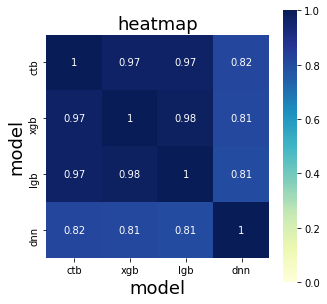

In [8]:
te = pd.DataFrame()
te['ctb'] = result1.d
te['xgb'] = result2.d
te['lgb'] = result3.d
te['dnn'] = result4.d

fig, ax = plt.subplots(figsize = (5,5))
dfData = te.corr()
sns.heatmap(dfData, annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

ax.set_title('heatmap', fontsize = 18)
ax.set_ylabel('model', fontsize = 18)
ax.set_xlabel('model', fontsize = 18)